In [7]:
import time
import matplotlib.pyplot as plt
import tdt
import numpy as np
import pyautogui

In [8]:
#Synapse Experiment Name
EXPERIMENT = 'SignalGenerator'

#Identify gizmos and variables of interest 
MAIN_GIZMO = 'Filt1'
MAIN_PARAMETER = 'out_Main'
STIM_GIZMO = 'eStim1'
STIM_PARAMETER = 'out_Stim'

#Total Time to Run Experiment
TOTAL_TIME = 25

#Initialize variables
data = np.zeros((4,200))
stim = np.zeros((4,200))
seconds = np.zeros(200)
current_Time = 0
count = 0

# Connect to Synapse
syn = tdt.SynapseAPI('localhost')
syn.setCurrentExperiment(EXPERIMENT)

1

In [9]:
#Set Synapse mode to run
syn.setModeStr('Preview')

# Wait five seconds to give 'getSystemStatus' time to update internally
time.sleep(5)

In [10]:
#Qery Variable Infromation
info = syn.getParameterInfo(MAIN_GIZMO, MAIN_PARAMETER)
sz_main = syn.getParameterSize(MAIN_GIZMO, MAIN_PARAMETER)
sz_stim = syn.getParameterSize(STIM_GIZMO, STIM_PARAMETER)

#Begin runtime analysis
while current_Time < TOTAL_TIME:
    seconds[count] = time.time()
    # read all values from buffer
    
    #Get Current Time of Synapse System
    current_Time = syn.getSystemStatus()['recordSecs'] 
    
    #Get Real-time Neural Data From Synapse [#Channel x 1]
    data[:,count] = syn.getParameterValues(MAIN_GIZMO, MAIN_PARAMETER)
    
    #Get current Stimulation Values
    stim[:,count] = syn.getParameterValues(STIM_GIZMO,STIM_PARAMETER)
    
    #Output Keyboard signal to control unity game.
    if stim[0,count] == 1: #If Stim signal is 1 then send up arrow to unity
        pyautogui.keyDown('up')
        print('up arrow')
    elif stim[0,count] == -1: #If Stim signal is -1 then send down arrow to unity
        pyautogui.keyDown('down')
        print('down arrow')
    elif stim[0,count] == 0: #If Stim signal is 0 then stop sending keypresses to unity
        pyautogui.keyUp('up')
        pyautogui.keyUp('down')
        print('no movement')

    count = count+1

#Release any keys left held down
pyautogui.keyUp('up')
pyautogui.keyUp('down')

#End Synapse Experiment (Returns to Idle state)
syn.setModeStr('Idle')
print('Done') 

up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no movement
up arrow
up arrow
up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no movement
up arrow
up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no movement
up arrow
up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no movement
up arrow
up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no movement
up arrow
up arrow
up arrow
up arrow
up arrow
no movement
no movement
down arrow
down arrow
down arrow
down arrow
down arrow
no movement
no movement
no movement
no

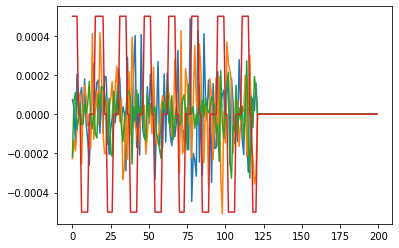

In [11]:
#For debugging: plots recorded data from three channels and the stim overlayed
plt.plot(data[0:3,:].T)
plt.plot(.0005*stim[0,:].T)

In [12]:
a = seconds[count-1]-seconds[0]
print(a)
print((count-1)/25)

26.11159372329712
4.8
